【問題1】データセットの取得

In [1]:
import numpy as np
import pandas as pd

# ファイル名（パス）を指定する
# csv_path = "E:\DiveIntoCode\source\train.csv" ←「\」だとエスケープシーケンス「\t」になるからダメな模様
csv_path = "E:/DiveIntoCode/source/train.csv" # 絶対パス
#csv_path = "../train.csv" # 相対パス

# 指数表示の禁止を設定する
np.set_printoptions(suppress=True)

# csvファイル読み込み ※該当のcsvの１行目が列名となっているため、列名を指定したりせず、そのまま読み込む
df_train = pd.read_csv(csv_path)
print(type(df_train))
print(df_train)

<class 'pandas.core.frame.DataFrame'>
        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandCont

【問題2】データセット自体の調査

アイオワ州エイムズの住宅の（ほぼ）すべての側面を説明する79の項目をもっており、そこから、各住宅の最終価格の予測が可能と思われる

【問題3】データの確認<br>

　データを確認していきます。コードとマークダウンを組み合わせてレポートしてください。<br>
<br>
　① 各特徴量がどういったものかを見る。（数値データか文字データなど）<br>
　② 今回の目的変数はどの列か確認する。<br>
　③ 特徴量の平均値と標準偏差、四分位数を一度に表示させる。<br>

In [2]:
print("")
print("① 各特徴量がどういったものかを見る。（数値データか文字データなど）")
print("")
# データフレーム「df_train」の要素ごとの型を表示
print(df_train.dtypes)


① 各特徴量がどういったものかを見る。（数値データか文字データなど）

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


In [3]:
print("")
print("② 今回の目的変数はどの列か確認する。")
print("")
print("このデータセットは住宅の最終価格を予測するためのものであるため、目的とする変数は「SalePrice」となる")
print(df_train["SalePrice"])


② 今回の目的変数はどの列か確認する。

このデータセットは住宅の最終価格を予測するためのものであるため、目的とする変数は「SalePrice」となる
0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64


In [4]:
print("")
print("③ 特徴量の平均値と標準偏差、四分位数を一度に表示させる。")
print("")
print(df_train.describe())


③ 特徴量の平均値と標準偏差、四分位数を一度に表示させる。

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.6454

【問題4】欠損値への対応<br>
　① 各特徴量の欠損値の有無を確認する。<br>
　② 欠損値が何パーセント含まれるかを確認する。<br>
　③ 5つ以上欠損値がある特徴量（列）は削除する。<br>
　④ 5つ以上欠損値がある特徴量を削除したデータから、欠損値があるサンプル（行）は削除する。<br>

In [5]:
# 一度実行したため、コメントアウト
# pip install missingno

Note: you may need to restart the kernel to use updated packages.



① 各特徴量の欠損値の有無を確認する。

AxesSubplot(0.125,0.125;0.698618x0.755)


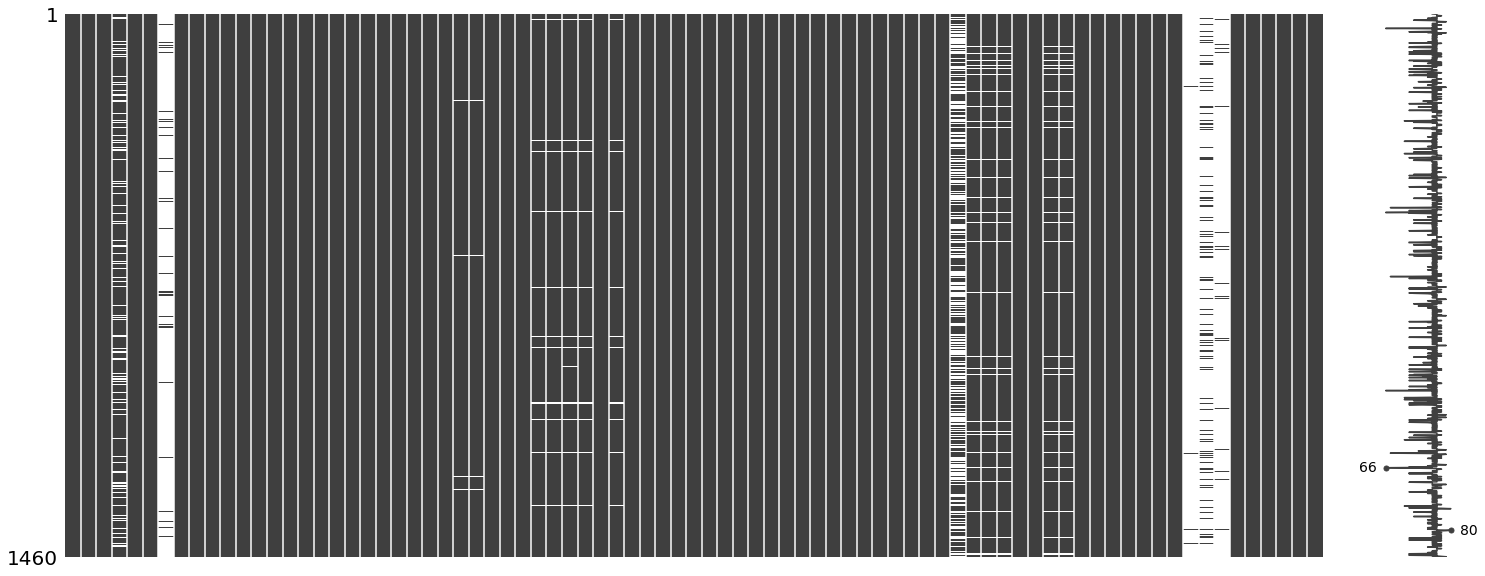

In [4]:
import missingno as msno

print("")
print("① 各特徴量の欠損値の有無を確認する。")
print("")
#print(msno.bar(df_train))
print(msno.matrix(df_train))

In [5]:
print("")
print("② 欠損値が何パーセント含まれるかを確認する。")
print("")
#print(df_train.isnull().sum()[df_train.isnull().sum()>0].sort_values())
series_missing = df_train.isnull().sum() / len(df_train) * 100
missing_percent = 0
print(series_missing)
for i in range(len(series_missing)):
    missing_percent += series_missing[i]
print("欠損値が含まれる確率は：{:.2f}%".format(missing_percent/len(series_missing)))


② 欠損値が何パーセント含まれるかを確認する。

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64
欠損値が含まれる確率は：5.89%


In [6]:
print("")
print("③ 5つ以上欠損値がある特徴量（列）は削除する。")
print("")
# 列を削除するので、元のデータフレームを退避
df_train_1 = df_train

# 削除する列名を格納するための配列
list_delete = []

# 各列別の欠損値の数
missing_cnt = df_train.isnull().sum()

# データフレームの列数分ループ
for i in range(len(missing_cnt)):
    # 欠損値が5以上の場合、missing_cntに列名を追加
    if missing_cnt[i] >= 5:
        list_delete.append(df_train_1.columns[i])

# 欠損値が5以上の列を削除
for i in list_delete:
    # 列を削除
    df_train_1 = df_train_1.drop(columns=i)
print(df_train_1)


③ 5つ以上欠損値がある特徴量（列）は削除する。

        Id  MSSubClass MSZoning  LotArea Street LotShape LandContour  \
0        1          60       RL     8450   Pave      Reg         Lvl   
1        2          20       RL     9600   Pave      Reg         Lvl   
2        3          60       RL    11250   Pave      IR1         Lvl   
3        4          70       RL     9550   Pave      IR1         Lvl   
4        5          60       RL    14260   Pave      IR1         Lvl   
...    ...         ...      ...      ...    ...      ...         ...   
1455  1456          60       RL     7917   Pave      Reg         Lvl   
1456  1457          20       RL    13175   Pave      Reg         Lvl   
1457  1458          70       RL     9042   Pave      Reg         Lvl   
1458  1459          20       RL     9717   Pave      Reg         Lvl   
1459  1460          20       RL     9937   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0       AllPub    Inside     

④ 5つ以上欠損値がある特徴量を削除したデータから、欠損値があるサンプル（行）は削除する。

In [7]:
# 欠損値が一つでも含まれる行を削除
df_train_2 = df_train_1.dropna(how="any")
print(df_train_2)

        Id  MSSubClass MSZoning  LotArea Street LotShape LandContour  \
0        1          60       RL     8450   Pave      Reg         Lvl   
1        2          20       RL     9600   Pave      Reg         Lvl   
2        3          60       RL    11250   Pave      IR1         Lvl   
3        4          70       RL     9550   Pave      IR1         Lvl   
4        5          60       RL    14260   Pave      IR1         Lvl   
...    ...         ...      ...      ...    ...      ...         ...   
1455  1456          60       RL     7917   Pave      Reg         Lvl   
1456  1457          20       RL    13175   Pave      Reg         Lvl   
1457  1458          70       RL     9042   Pave      Reg         Lvl   
1458  1459          20       RL     9717   Pave      Reg         Lvl   
1459  1460          20       RL     9937   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0       AllPub    Inside       Gtl  ...             0   

【問題5】用語の調査<br>
　以下の２つの単語を知る必要があります。これらを調査してまとめてください。<br>
　　① 尖度<br>
　　② 歪度<br>

① 尖度・・・正規分布と比べて、分布がどれだけ尖っているか、を示す指標。<br>
　　　　　　 データが平均付近に集中し分布の幅が狭くなっている（尖度が大きい）場合に、正の値をとる。<br>
　　　　　　 データが平均付近から散らばって分布の幅が広く浅い（尖度が小さい）場合に、負の値をとる。<br>
　　　　　　 歪度と共に用いられる（それぞれが独立した指標ではない）。<br>
　　　　　　 また、正規分布の尖度を「0」とする定義と「3」とする2つの定義が存在し、一般的には正規分布の尖度を「0」とすることが主流である<br>
<br>
$$
    \frac{n(n+1)}{(n-1)(n-2)(n-3)}\sum_{i=1}^{n}\frac{(x_i-\bar{x})^4}{s^4}-\frac{3(n-1)^2}{(n-2)(n-3)}
$$

② 歪度・・・正規分布と比べて、分布がどれだけ左右非対称になっている（歪んでいる）か、を示す指標。<br>
　　　　　　 データが(向かって)左側に集中して山があり、(向かって)右側へ長く裾を引く形(右に歪んだ分布)の場合、正の値をとる。<br>
　　　　　　 データが(向かって)右側に集中して山があり、(向かって)左側へ長く裾を引く形(左に歪んだ分布)の場合、負の値をとる。<br>
　　　　　　 尖度と共に用いられる（それぞれが独立した指標ではない）。<br>
$$
    \frac{n}{(n-1)(n-2)}\sum_{i=1}^{n}\frac{(x_i-\bar{x})^3}{s}
$$

【問題6】分布の確認<br>
　① seabornのsns.displot()やsns.histplot()を使い目的変数の分布を表示し、「尖度」と「歪度」も算出する。<br>
　② 目的変数に対して対数変換を行う。<br>
　③ 対数変換したものに対して分布を表示し、「尖度」と「歪度」も算出する。<br>
　④ 対数変換の前後での変化を「正規分布」という言葉を含めて説明してください。このように加工することで予測時の精度を上げることができます。


① seabornのsns.displot()やsns.histplot()を使い目的変数の分布を表示し、「尖度」と「歪度」も算出する。



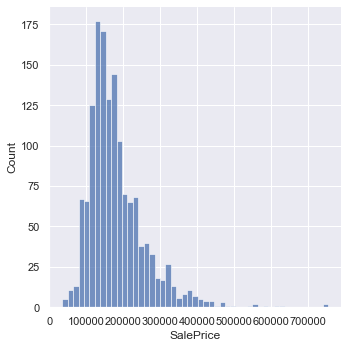

　　===== 尖度 =====
6.529263049673958

　　===== 歪度 =====
1.8819429948035529


In [36]:
import seaborn as sns
import matplotlib.pyplot as plt


print("")
print("① seabornのsns.displot()やsns.histplot()を使い目的変数の分布を表示し、「尖度」と「歪度」も算出する。")
print("")

# グラフの表示スタイル設定
sns.set(style="darkgrid")

# 目的変数（SalePrice）をグラフに表示
#sns.distplot(df_train_2["SalePrice"]) # 警告メッセージが出る「distplot」ではなく、「displot」か「histplot」を使うように、と
sns.displot(df_train_2["SalePrice"])
#sns.histplot(df_train_2["SalePrice"]) # 出力結果は「displot」と同じ
plt.show()

# 関数を使用して尖度と歪度を計算
kurt = df_train_2["SalePrice"].kurt() # 尖度
skew = df_train_2["SalePrice"].skew() # 歪度
print("　　===== 尖度 =====")
print(kurt)
print("")
print("　　===== 歪度 =====")
print(skew)

# 各関数の引数の「numeric_only」はデフォルトでNoneだが非推奨であるため、警告メッセージが出る。そのため、数値のみ使う「True」を指定
# ↑データフレーム型を使用していたため。目的変数のみ（Series型）であればデフォルトのままで良かった
# kurt = df_train_2.kurt(numeric_only=True) # 尖度
# skew = df_train_2.skew(numeric_only=True) # 歪度

In [28]:
print("")
print("② 目的変数に対して対数変換を行う。")
print("")

# 目的変数「SalePrice」を対数変換
# print(df_train_2["SalePrice"])
log_df_train_2 = np.log(df_train_2["SalePrice"])
print(log_df_train_2)


② 目的変数に対して対数変換を行う。

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1459, dtype: float64



③ 対数変換したものに対して分布を表示し、「尖度」と「歪度」も算出する。



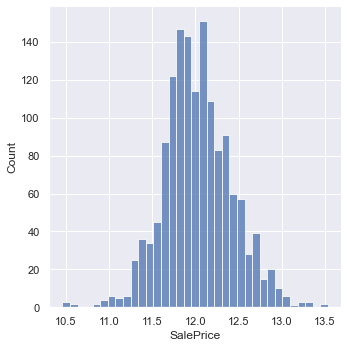

　　===== 尖度 =====
0.806927847502148

　　===== 歪度 =====
0.12131775882415026


In [38]:
print("")
print("③ 対数変換したものに対して分布を表示し、「尖度」と「歪度」も算出する。")
print("")

# グラフの表示スタイル設定
sns.set(style="darkgrid")

# 目的変数（SalePrice）をグラフに表示
sns.displot(log_df_train_2)
plt.show()

# 関数を使用して尖度と歪度を計算
log_kurt = log_df_train_2.kurt() # 尖度
log_skew = log_df_train_2.skew() # 歪度
print("　　===== 尖度 =====")
print(log_kurt)
print("")
print("　　===== 歪度 =====")
print(log_skew)

④ 対数変換の前後での変化を「正規分布」という言葉を含めて説明してください。このように加工することで予測時の精度を上げることができます。

　対数変換前は尖度と歪度が共に大きく、グラフが歪んでいたが、<br>
　対数変換後は尖度と歪度が小さくなり、正規分布になった

【問題7】相関係数の確認<br>
特徴量の確認をしていきます。それぞれに対してマークダウンで説明や考察を書いてください。<br>
<br>
　① 相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。<br>
　② 目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る。<br>
　③ 選んだ10個の特徴量が何か表しているかをKaggleのDataDescriptionの記述を参考に日本語でまとめる。<br>
　④ 選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す。


① 相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。



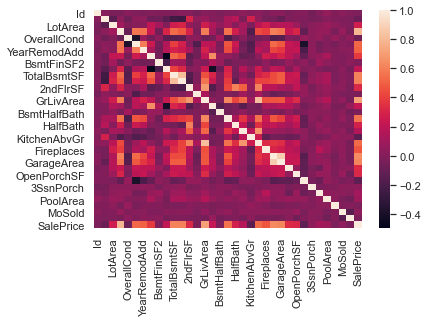

In [43]:
print("")
print("① 相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。")
print("")

# 相関係数をcorr関数を使って求める
corr_df_train_2 = df_train_2.corr()

# 相関係数をヒートマップで表示
# print(corr_df_train_2)
sns.heatmap(corr_df_train_2)
plt.show()

ヒートマップは値を確認することなく、相関性のあるなしをある程度把握することが出来るため、おおよその目星をつけるのに利便性が高いと思われる。


② 目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る。



,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
OverallQual,1.000000,0.593021,0.600991,0.561980,0.537523,0.475933,0.551267,0.427720,0.573334,0.551605
GrLivArea,0.593021,1.000000,0.467321,0.468971,0.455001,0.566084,0.630283,0.825576,0.199286,0.287677
GarageCars,0.600991,0.467321,1.000000,0.882613,0.435279,0.439726,0.469619,0.362248,0.537866,0.420573
GarageArea,0.561980,0.468971,0.882613,1.000000,0.486719,0.489741,0.405944,0.337915,0.479460,0.372012
TotalBsmtSF,0.537523,0.455001,0.435279,0.486719,1.000000,0.819393,0.324886,0.286125,0.393159,0.292546
1stFlrSF,0.475933,0.566084,0.439726,0.489741,0.819393,1.000000,0.381438,0.409901,0.283056,0.241344
FullBath,0.551267,0.630283,0.469619,0.405944,0.324886,0.381438,1.000000,0.554759,0.467960,0.438733
TotRmsAbvGrd,0.427720,0.825576,0.362248,0.337915,0.286125,0.409901,0.554759,1.000000,0.095401,0.191603
YearBuilt,0.573334,0.199286,0.537866,0.479460,0.393159,0.283056,0.467960,0.095401,1.000000,0.592512
YearRemodAdd,0.551605,0.287677,0.420573,0.372012,0.292546,0.241344,0.438733,0.191603,0.592512,1.000000


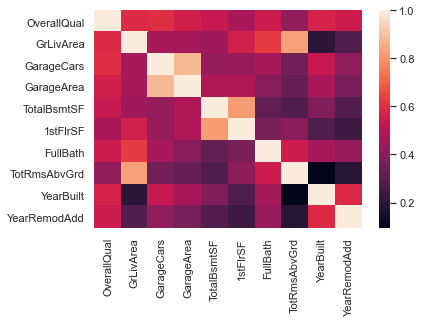

In [104]:
print("")
print("② 目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る。")
print("")

# corr_df_train_2を目的変数のみに絞り、そのSeriesを絶対値にしてソート（降順）、上位11データ（目的変数を除くため）を取得
corr_saleprice_10 = abs(corr_df_train_2["SalePrice"]).sort_values(ascending=False)[1:11]

# 列名を配列へ取得
corr_saleprice_10_columns = []
for corr_saleprice_10_column in corr_saleprice_10.index:
    corr_saleprice_10_columns.append(corr_saleprice_10_column)

# 該当列名のみのdataframeを作成 行のみ（行と列は同時にフィルターを掛けられないので順番に） ※処理を1行で記載することは可能
df_10_columns = corr_df_train_2.filter(items=corr_saleprice_10_columns, axis=0).filter(items=corr_saleprice_10_columns, axis=1)

display(df_10_columns)

# 相関係数をヒートマップで表示
sns.heatmap(df_10_columns)
plt.show()

数が減った分ヒートマップ自体は見やすくなった。<br>
前提条件として、目的変数との相関性が高い上位10種であることを踏まえたうえで相関性を考慮する必要がある<br>

In [103]:
print("")
print("③ 選んだ10個の特徴量が何か表しているかをKaggleのDataDescriptionの記述を参考に日本語でまとめる。")


③ 選んだ10個の特徴量が何か表しているかをKaggleのDataDescriptionの記述を参考に日本語でまとめる。


　 1.OverallQual…家の全体的な素材と仕上げの評価<br>
　 2.GrLivArea…地上の面積 ※アメリカでは家の面積が地上と地下に分かれて表示される<br>
　 3.GarageCars…車の容量に対するガレージのサイズ<br>
　 4.GarageArea…ガレージのサイズ	<br>
　 5.TotalBsmtSF…地下室の総容量<br>
　 6.1stFlrSF…1Fの広さ<br>
　 7.FullBath…地上にあるバスルーム<br>
　 8.TotRmsAbvGrd…地上にある、バスルーム以外の、部屋の総数<br>
　 9.YearBuilt…築年数<br>
　10.YearRemodAdd…リフォーム日（リフォームが無い場合は工事日）<br>

In [137]:
print("")
print("④ 選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す。")
print("")


no1 = 0 # 一番相関係数が高い値
no2 = 0 # 二番目に相関係数が高い値
no3 = 0 # 三番目に相関係数が高い値
array_no1 = [] # 一番相関係数が高い組み合わせ（名称）
array_no2 = [] # 一番相関係数が高い組み合わせ（名称）
array_no3 = [] # 一番相関係数が高い組み合わせ（名称）
j = 0 # 重複（行と列が入れ替わっただけ）データを除外するための変数

# 対象のデータフレームの値を全て比較し、上位3つを取得
# 1行ずつループ
for row in df_10_columns.itertuples():
    # インクリメント（重複データを比較から省くため）
    j += 1
    # rowの値を1つずつ(全10列分)比較（row[0]はindexが入るためループからは除外）
    # range(j+1,10) ⇒ 行データの「1.0」を含む左側を比較対象から省き、右側のみで比較を行う
    for i in range(j+1, 10):
        # 一番相関係数が高い組み合わせと比較
        # 同じ値の場合は繰り下げる（同率にはしない）
        if no1 == 0:
            no1 = row[i]
            array_no1 = row[0] + ":" + df_10_columns.columns[i-1] + ":" + str(row[i])
        else:
            if no1 > row[i]:
                if no2 > row[i]:
                    if no3 > row[i]:
                        None
                    else:
                        no3 = row[i]
                        array_no3 = row[0] + ":" + df_10_columns.columns[i-1] + ":" + str(row[i])
                else:
                    no3 = no2
                    array_no3 = array_no2
                    no2 = row[i]
                    array_no2 = row[0] + ":" + df_10_columns.columns[i-1] + ":" + str(row[i])
            else:
                no3 = no2
                array_no3 = array_no2
                no2 = no1
                array_no2 = array_no1
                no1 = row[i]
                array_no1 = row[0] + ":" + df_10_columns.columns[i-1] + ":" + str(row[i])

print("相関関数が一番高い組み合わせと値は：{}".format(array_no1))
print("相関関数が二番目に高い組み合わせと値は：{}".format(array_no2))
print("相関関数が三番目に高い組み合わせと値は：{}".format(array_no3))



④ 選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す。

相関関数が一番高い組み合わせと値は：GarageCars:GarageArea:0.8826130266800467
相関関数が二番目に高い組み合わせと値は：GrLivArea:TotRmsAbvGrd:0.8255764500702395
相関関数が三番目に高い組み合わせと値は：TotalBsmtSF:1stFlrSF:0.8193932708606798
